In [1]:
import csv
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import load_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load the model
model = load_model('./model.h5')

In [3]:
# Turn the cropping layer into a callable functor
output = model.layers[0].output
functor = K.function([model.input]+ [K.learning_phase()], [output] )

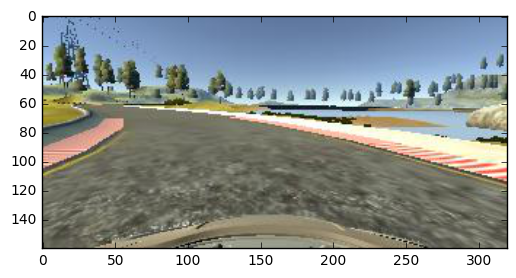

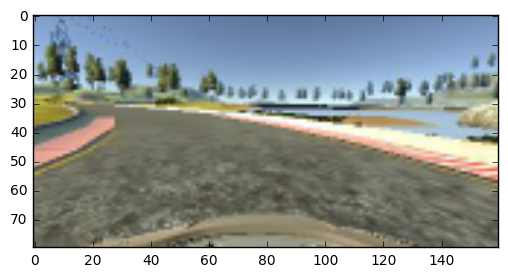

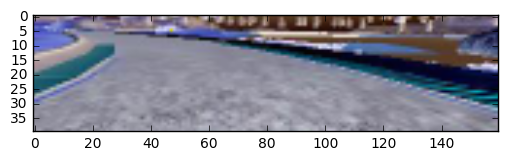

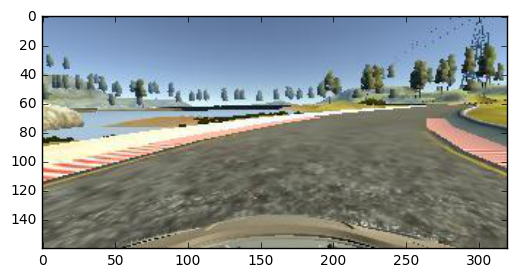

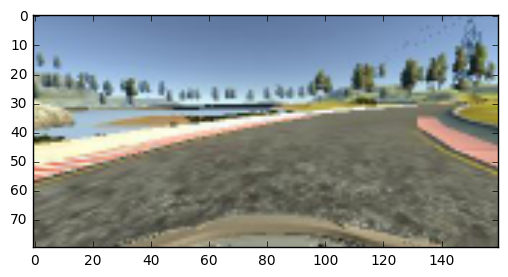

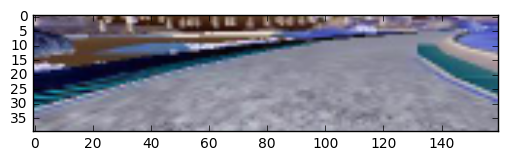

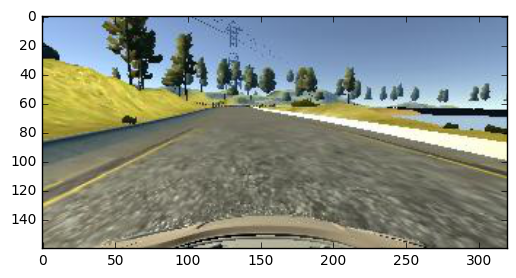

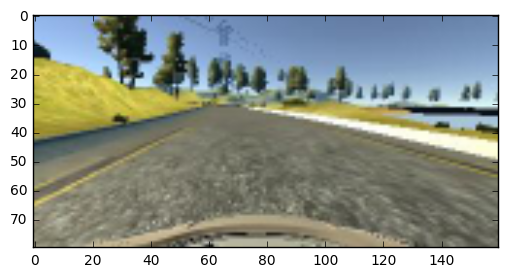

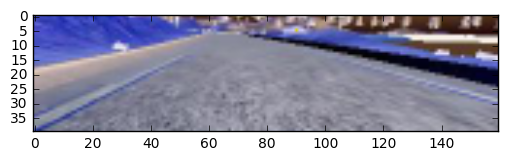

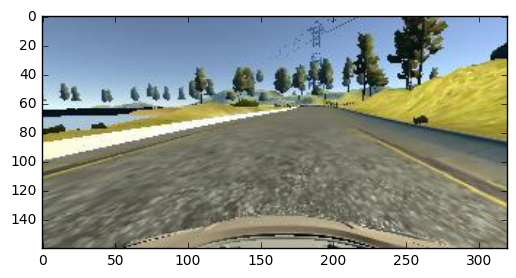

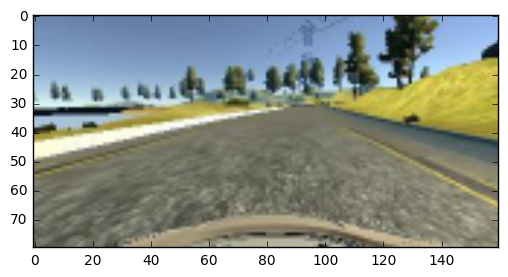

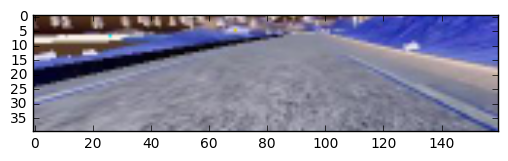

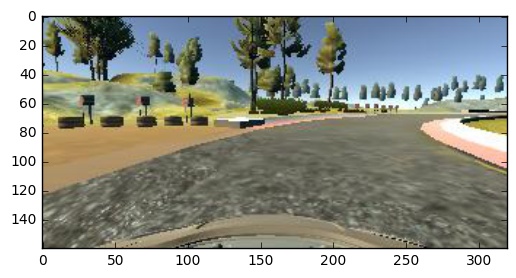

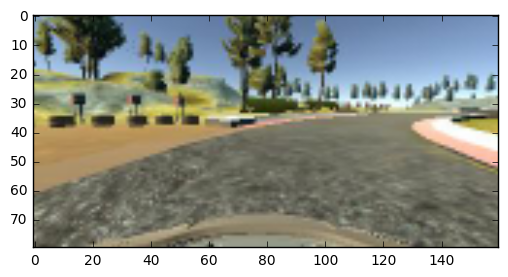

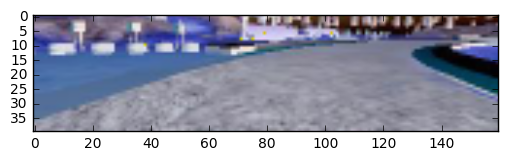

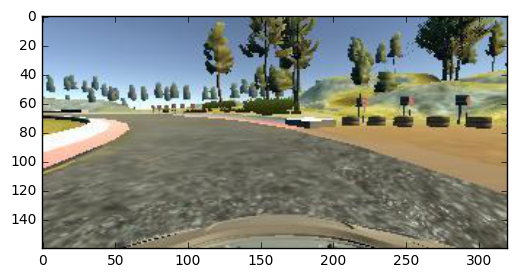

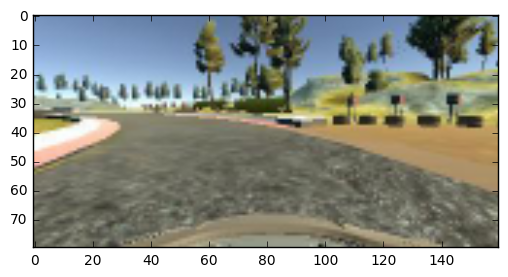

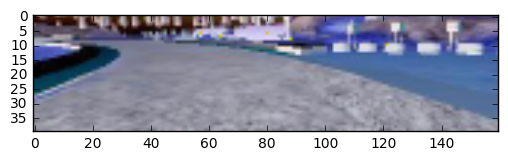

In [8]:
test_data_path = './left_straight_right/'

# Predict the steering angle of the 6 test images (2 left, 2 straight, 2 right)
tests = []
with open(test_data_path + 'driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  # skip the headers
    for line in reader:
        image_path = test_data_path + 'IMG/' + line[0].split('/')[-1]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(image)
        image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
        plt.figure()
        plt.imshow(image)
        steering_angle = float(line[3])
        tests.append((image, steering_angle))

#         print('Test image shape: {}'.format(image.shape))
        output = functor([[image], 1.])[0]
#         print('Output image shape: {}'.format(output.shape))
        plt.figure()
        plt.imshow(output[0])

        steering_angle = float(line[3])
        tests.append((image, steering_angle))


In [5]:
for image, steering_angle in tests:
    image_array = np.asarray(image)
    prediction = float(model.predict(image_array[None, :, :, :], batch_size=1))
    error = (steering_angle - prediction) ** 2
    print('***********************************')
    print('Image: {}'.format(imgage_path))
    print('Steering angle: {} -- Prediction: {} -- Error: {}'.format(steering_angle, prediction, error))

***********************************


NameError: name 'imgage_path' is not defined

In [46]:
data_path = '../driving_data/'
lr_image_steering_offset = 0.1

samples = []
with open(data_path + 'driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  # skip the headers
    for line in reader:
        samples.append(line)
        
batch_sample = samples[0]
frame_samples = []

center_name  = data_path + 'IMG/' + batch_sample[0].split('/')[-1]
left_name    = data_path + 'IMG/' + batch_sample[1].split('/')[-1]
right_name   = data_path + 'IMG/' + batch_sample[2].split('/')[-1]

center_image = cv2.imread(center_name)
left_image   = cv2.imread(left_name)
right_image  = cv2.imread(right_name)

center_image_flipped = center_image.copy()
center_image_flipped = cv2.flip(center_image_flipped, 1)
left_image_flipped   = left_image.copy()
left_image_flipped   = cv2.flip(left_image_flipped, 1)
right_image_flipped  = right_image.copy()
right_image_flipped  = cv2.flip(right_image_flipped, 1)

center_angle = float(batch_sample[3])
# Compensate right for the left image
left_angle   = center_angle + lr_image_steering_offset
# Compensate left for the right image
right_angle  = center_angle - lr_image_steering_offset

frame_samples.append([left_image, left_angle])
frame_samples.append([left_image_flipped, -left_angle])
frame_samples.append([right_image, right_angle])
frame_samples.append([right_image_flipped, -right_angle])
# Ignore The center image unless the car is turning.
if center_angle <= 0.02 or center_angle >= 0.02:
    frame_samples.append([center_image, center_angle])
    frame_samples.append([center_image_flipped, -center_angle])


Angle: 0.13065257000000002
Angle: -0.13065257000000002
Angle: -0.26934743
Angle: 0.26934743
Angle: -0.06934743
Angle: 0.06934743


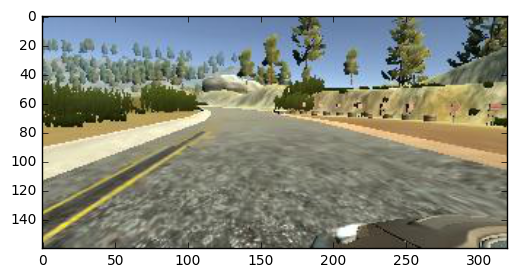

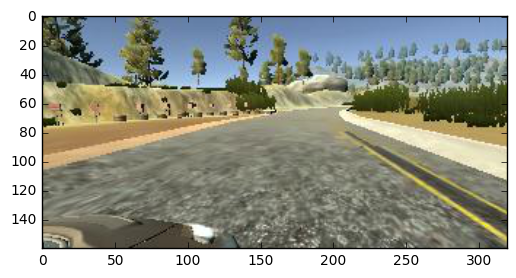

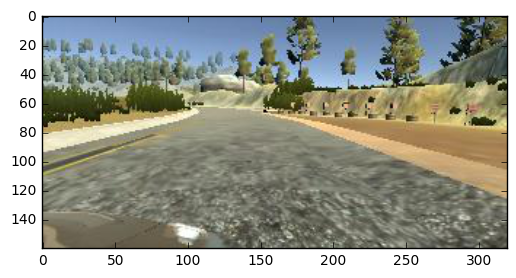

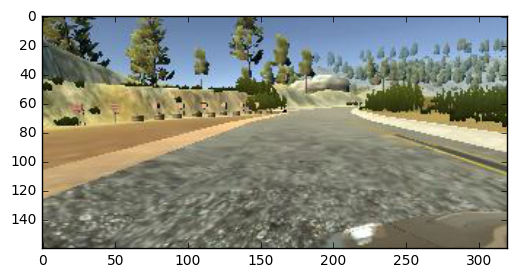

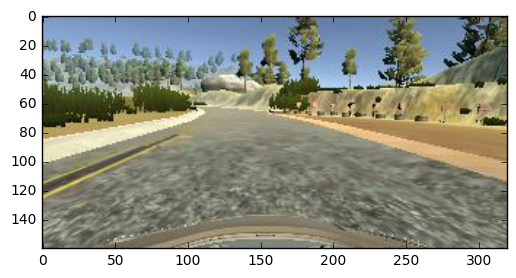

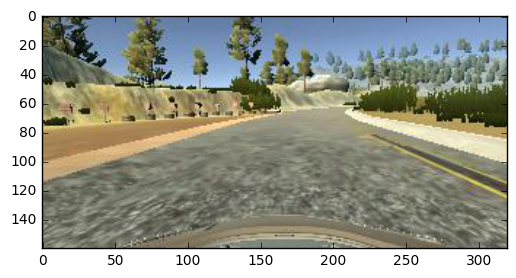

In [47]:
for image, angle in frame_samples:
    print('Angle: {}'.format(angle))
    plt.figure()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)